# Clasificador de dígitos por imágenes de 28x28

Realizaremos una red neuronal para identificar el número que se encuentra en una imagen de 28 x 28 píxeles. Todo este proceso será a través de una API gracias al servicio de Flask. Este servidor contendrá un formulario web en el cual se introducirá la imagen de la cual queremos obtener el número que se encuentra.

In [1]:
# Importar el dataframe de Mnist desde keras
from tensorflow.keras.datasets import mnist

# Cargar el dataset de Mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

In [2]:
import numpy as np

print(f"Datos de entrenamiento: {train_images.shape}")
print(f"Datos de prueba: {test_images.shape}")
print(f"Etiquetas de entrenamiento: {train_labels.shape}")
print(f"Etiquetas de prueba: {test_labels.shape}")
print(f"Etiquetas de las imágenes: {np.unique(train_labels)}")

Datos de entrenamiento: (60000, 28, 28)
Datos de prueba: (10000, 28, 28)
Etiquetas de entrenamiento: (60000,)
Etiquetas de prueba: (10000,)
Etiquetas de las imágenes: [0 1 2 3 4 5 6 7 8 9]


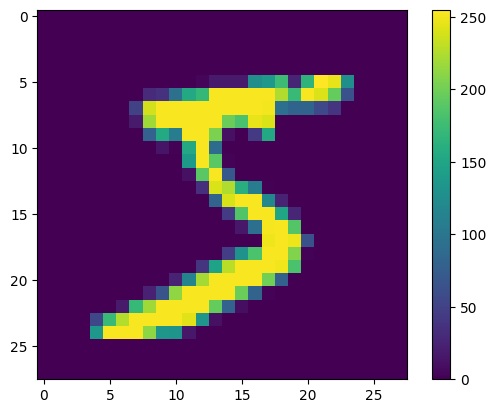

In [3]:
# Ver una imagen de ejemplo
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(train_images[0]) # imshow: Muestra una imagen
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Normalización de las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Modelado de la red neuronal
from tensorflow import keras
from tensorflow.keras import models

model = models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compilación del modelo
model.compile(
    optimizer='adam', # Adam es un optimizador que se adapta a los datos
    loss='sparse_categorical_crossentropy', # Función de pérdida para clasificación
    metrics=['accuracy'] # Métrica para evaluar el modelo
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Métrica a monitorear
    patience=10, # Número de épocas sin mejora
    min_delta=0.001, # Diferencia mínima entre épocas
    restore_best_weights=True # Restaurar los mejores pesos
)

# Entrenamiento del modelo
history = model.fit(
    train_images, train_labels, # Datos de entrenamiento y etiquetas
    epochs=100, # Número de épocas para entrenar
    batch_size=128, # Tamaño del lote
    callbacks=[early_stopping], # Callbacks para el entrenamiento
    verbose=1 # Mostrar información del entrenamiento
)


Epoch 1/100


469/469 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.9020
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1594 - accuracy: 0.9550
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9678
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9750
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9790
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9829
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9857
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9874
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.9907
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0299 - acc

In [7]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión del modelo: {test_acc}')
print(f'Pérdida del modelo: {test_loss}')

313/313 [==============================] - 0s 957us/step - loss: 0.1220 - accuracy: 0.9808
Precisión del modelo: 0.9807999730110168
Pérdida del modelo: 0.12196827679872513


In [8]:
# Predicción de una imagen
predictions = model.predict(test_images)
print(f'Predicción de la imagen: {np.argmax(predictions[0])}')
print(f'Etiqueta de la imagen: {test_labels[0]}')

313/313 [==============================] - 0s 1ms/step
Predicción de la imagen: 7
Etiqueta de la imagen: 7


In [10]:
# Guardar el modelo
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)